# Training Pipeline

In [22]:
%load_ext autoreload
%autoreload 2

import boto3
import sagemaker


region = boto3.Session().region_name
role = sagemaker.get_execution_role()
default_bucket = sagemaker.session.Session().default_bucket()

model_package_group_name = f"sm-mnist-demo-p-ixctym1pdnhg"
pipeline_name = f"sm-mnist-demo-pipeline-notebook"
base_job_prefix = "sm-mnist-demo"

from pipelines.mnist.pipeline import get_pipeline

pipeline = get_pipeline(
    region=region,
    role=role,
    default_bucket=default_bucket,
    model_package_group_name=model_package_group_name,
    pipeline_name=pipeline_name,
    base_job_prefix=base_job_prefix,
    use_hpo=False
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The class JsonGet has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [23]:
pipeline.upsert(role_arn=role)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


{'PipelineArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:pipeline/sm-mnist-demo-pipeline-notebook',
 'ResponseMetadata': {'RequestId': '10c9fd77-aa32-47d0-88be-89e0b6f0cb46',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '10c9fd77-aa32-47d0-88be-89e0b6f0cb46',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '104',
   'date': 'Tue, 15 Mar 2022 02:32:02 GMT'},
  'RetryAttempts': 0}}

In [24]:
execution = pipeline.start(    
    parameters=dict(
        TrainingInstanceType="ml.g4dn.12xlarge",
        TrainingInstanceCount="2"
    ))

In [9]:
execution.describe()

{'PipelineArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:pipeline/sm-mnist-pipeline-notebook-hpo',
 'PipelineExecutionArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:pipeline/sm-mnist-pipeline-notebook-hpo/execution/jdfxmppzx39g',
 'PipelineExecutionDisplayName': 'execution-1647310588212',
 'PipelineExecutionStatus': 'Executing',
 'PipelineExperimentConfig': {'ExperimentName': 'sm-mnist-pipeline-notebook-hpo',
  'TrialName': 'jdfxmppzx39g'},
 'CreationTime': datetime.datetime(2022, 3, 15, 2, 16, 28, 84000, tzinfo=tzlocal()),
 'LastModifiedTime': datetime.datetime(2022, 3, 15, 2, 16, 28, 84000, tzinfo=tzlocal()),
 'CreatedBy': {'UserProfileArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:user-profile/d-selnllxb1l52/shimdx-010',
  'UserProfileName': 'shimdx-010',
  'DomainId': 'd-selnllxb1l52'},
 'LastModifiedBy': {'UserProfileArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:user-profile/d-selnllxb1l52/shimdx-010',
  'UserProfileName': 'shimdx-010',
  'DomainId': 'd-se

# Hyper Parameter Optimization

In [25]:
%load_ext autoreload
%autoreload 2

import boto3
import sagemaker


region = boto3.Session().region_name
role = sagemaker.get_execution_role()
default_bucket = sagemaker.session.Session().default_bucket()

model_package_group_name = f"sm-mnist-demo-p-ixctym1pdnhg"
pipeline_name = f"sm-mnist-demo-pipeline-notebook-hpo"
base_job_prefix = "sm-mnist-demo"

from pipelines.mnist.pipeline import get_pipeline

pipeline = get_pipeline(
    region=region,
    role=role,
    default_bucket=default_bucket,
    model_package_group_name=model_package_group_name,
    pipeline_name=pipeline_name,
    base_job_prefix=base_job_prefix,
    use_hpo=True
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The class JsonGet has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [26]:
pipeline.upsert(role_arn=role)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


{'PipelineArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:pipeline/sm-mnist-demo-pipeline-notebook-hpo',
 'ResponseMetadata': {'RequestId': 'd171c944-6318-4dd7-8b2f-2637711d0a24',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'd171c944-6318-4dd7-8b2f-2637711d0a24',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '108',
   'date': 'Tue, 15 Mar 2022 02:32:07 GMT'},
  'RetryAttempts': 0}}

In [27]:
execution = pipeline.start()

In [9]:
execution.describe()

{'PipelineArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:pipeline/sm-mnist-pipeline-notebook',
 'PipelineExecutionArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:pipeline/sm-mnist-pipeline-notebook/execution/ylw4o4xdqwa2',
 'PipelineExecutionDisplayName': 'execution-1647262325689',
 'PipelineExecutionStatus': 'Executing',
 'PipelineExperimentConfig': {'ExperimentName': 'sm-mnist-pipeline-notebook',
  'TrialName': 'ylw4o4xdqwa2'},
 'CreationTime': datetime.datetime(2022, 3, 14, 12, 52, 5, 553000, tzinfo=tzlocal()),
 'LastModifiedTime': datetime.datetime(2022, 3, 14, 12, 52, 5, 553000, tzinfo=tzlocal()),
 'CreatedBy': {'UserProfileArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:user-profile/d-selnllxb1l52/shimdx-010',
  'UserProfileName': 'shimdx-010',
  'DomainId': 'd-selnllxb1l52'},
 'LastModifiedBy': {'UserProfileArn': 'arn:aws:sagemaker:ap-northeast-2:238312515155:user-profile/d-selnllxb1l52/shimdx-010',
  'UserProfileName': 'shimdx-010',
  'DomainId': 'd-selnllxb1l52

# Test Endpoint

[9 5 9 6 2 4 6 7 7 0 6 6 9 4 8 3]


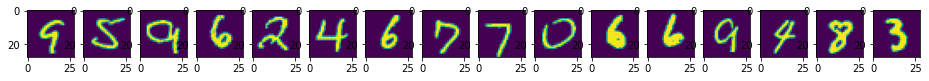

In [2]:
import json
import numpy as np
import boto3
import random
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import MNIST
from torchvision import datasets, transforms

%matplotlib inline


def run_test(dataset, sagemaker_runtime, show_img=False, endpoint_name='sm-mnist-stage'):
    randidx = random.randint(0,9985)
    testdata = {"inputs": dataset.data.view(-1,1,28,28)[randidx:randidx+16].numpy().tolist()}
    response = sagemaker_runtime.invoke_endpoint(
                                EndpointName=endpoint_name, 
                                Body=bytes(json.dumps(testdata), 'utf-8'),
                                ContentType="application/json"
                                )

    result = np.argmax(json.loads(response['Body'].read().decode('utf-8')), axis=1)
    
    if show_img:
        fig, axs = plt.subplots(nrows=1, ncols=16, figsize=(16, 1))
        for i, splt in enumerate(axs):
            splt.imshow(testset.data[randidx+i].numpy())
    return result
    
region = boto3.Session().region_name
sagemaker_runtime = boto3.client("sagemaker-runtime", region_name=region)
endpoint_name='sm-mnist-prod'

mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (1.0,))])
testset = MNIST("./data", transform=mnist_transform, train=False, download=True)

print(run_test(testset, sagemaker_runtime, True))

In [23]:
json.dumps({"inputs": testset.data.view(-1,1,28,28)[0].numpy().tolist()})

'{"inputs": [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 84, 185, 159, 151, 60, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 222, 254, 254, 254, 254, 241, 198, 198, 198, 198, 198, 198, 198, 198, 170, 52, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 67, 114, 72, 114, 163, 227, 254, 225, 254, 254, 254, 250, 229, 254, 254, 140, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 66, 14, 67, 67, 67

# Autoscaling / Load test 

In [3]:
%%time
for i in range(1000000):
    run_test(testset, sagemaker_runtime, False, 'sm-mnist-demo-stage')

KeyboardInterrupt: 